# **Project Name**

## **Video Game Sales Insight Analysis**

# **Project Summary**

This project analyzes global video game sales data to uncover key trends in platform popularity, genre preferences, and regional market differences.

By leveraging exploratory data analysis, we aim to discover business insights that can help video game companies make data-backed decisions for product development, marketing, and platform selection.

The dataset contains sales data for games that sold over 100,000 copies across North America, Europe, Japan, and other regions.

# **Problem Statement**

The video game industry is highly competitive, with success often depending on market preferences, platform reach, and genre trends. However, without data-driven insights, game developers and publishers risk launching games that do not align with customer demand.

This project seeks to identify what types of games sell best, where they sell the most, and which platforms dominate the market — enabling companies to make smarter strategic decisions.

# **Business Objective**

--> Identify high-performing genres and platforms to prioritize for future game releases.

--> Understand regional market trends to tailor marketing and distribution strategies effectively.

--> Recommend data-backed strategies to maximize global sales and reduce the risk of failure in future launches.

# **STEP 1: Know Your Data or Data Understanding**

**In this step, we explored the dataset's basic structure, size, and quality to build an initial understanding before diving deeper into analysis.**

## **Import Libraries**

In [1]:
# Basic Data Analysis Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset Loading**

In [2]:
# Upload step for Google Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('vgsales.csv')

Saving vgsales.csv to vgsales.csv


## **Dataset First View**

In [3]:
# First 5 rows of dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Quick look at the shape and columns of dataset
print("Dataset Shape : ", df.shape)
df.columns


Dataset Shape :  (16598, 11)


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## **Dataset Shape & Structure**

In [6]:
#Duplicate Rows in dataset
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows in the Dataset: {duplicate_count}")

Total Duplicate Rows in the Dataset: 0


In [7]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumn Names:\n", df.columns.tolist())

Number of Rows: 16598
Number of Columns: 11

Column Names:
 ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


## **Missing Values/Null Values**

In [9]:
# Count missing values in each column of dataset
missing_values = df.isnull().sum()
print("Missing/Null Values per Column:\n")
print(missing_values[missing_values > 0])

Missing/Null Values per Column:

Year         271
Publisher     58
dtype: int64


In [10]:
# Missing value percentage of dataset
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Data Percentage per Column:\n")
print(missing_percentage[missing_percentage > 0])

Missing Data Percentage per Column:

Year         1.632727
Publisher    0.349440
dtype: float64


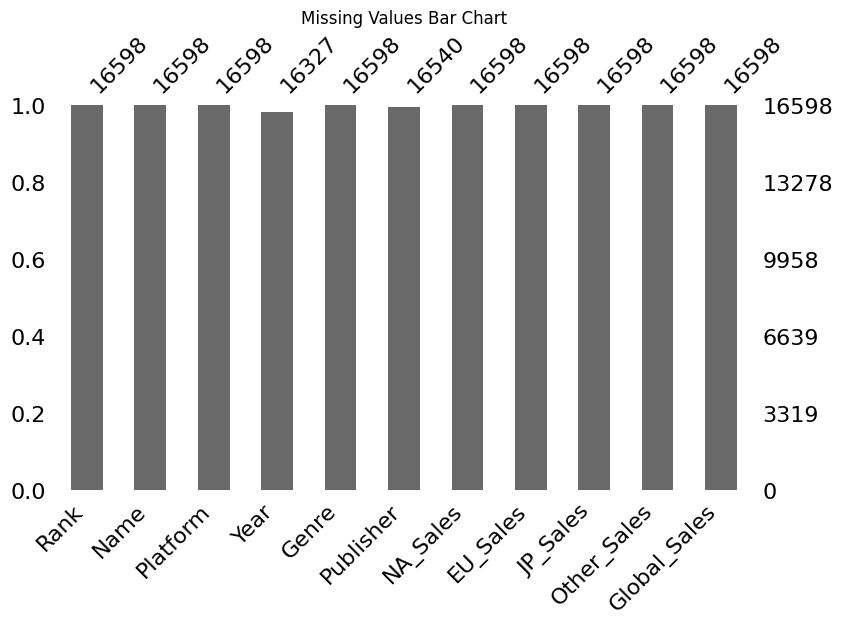

In [11]:
# Missing value Plot of dataset
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df, figsize=(9,5))
plt.title('Missing Values Bar Chart')
plt.show()

# **STEP 2: Understanding Dataset Variables**

**We analyzed each variable's unique values and data types to understand their significance, relevance, and potential impact on further analysis.**

In [12]:
# Basic Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
# Summary statistics of dataset
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## **Check Unique Values for Each Variable**

In [16]:
# Check Unique Values for each variable

print("Unique Values Count per Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values Count per Column:

Rank: 16598 unique values
Name: 11493 unique values
Platform: 31 unique values
Year: 39 unique values
Genre: 12 unique values
Publisher: 578 unique values
NA_Sales: 409 unique values
EU_Sales: 305 unique values
JP_Sales: 244 unique values
Other_Sales: 157 unique values
Global_Sales: 623 unique values


# **STEP 3: Data Wrangling, Cleaning, Preprocessing and Transformation**

**We cleaned missing values, corrected data types, and transformed features to ensure the dataset is reliable, consistent, and ready for meaningful analysis.**

In [17]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## **Missing Values or Null Values**

In [18]:
# Check how many missing values are in each column
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


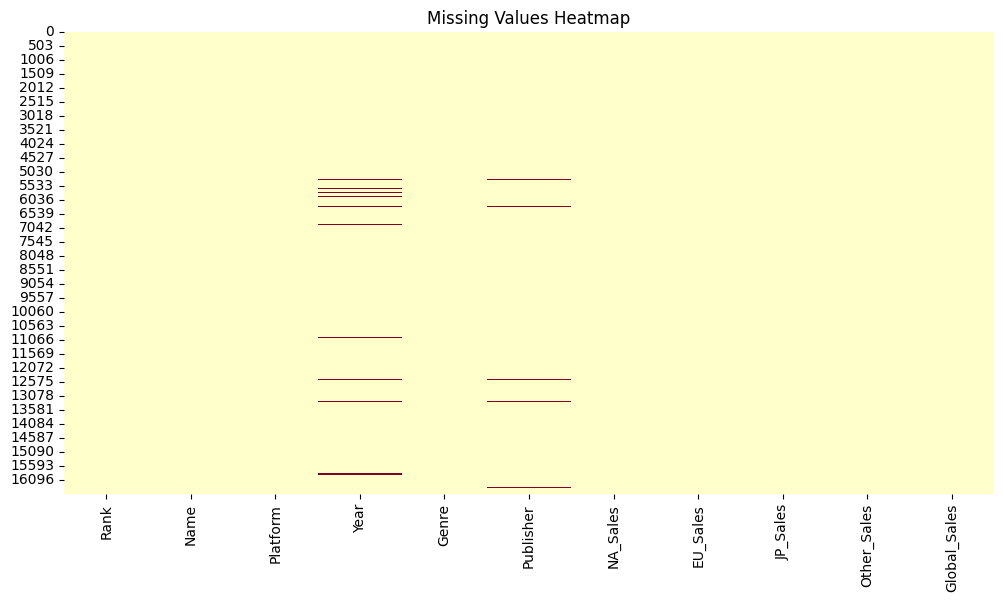

In [19]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

In [20]:
# Drop duplicates in both datasets
df.drop_duplicates(inplace=True)


In [45]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [22]:
# Final shape
print("Final Dataset - Shape after safe cleaning:", df.shape)

Final Dataset - Shape after safe cleaning: (16598, 11)


In [23]:
# Dataset Details after cleaning
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumn Names:\n", df.columns.tolist())

Number of Rows: 16598
Number of Columns: 11

Column Names:
 ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


# **STEP 4: EDA (Exploratory Data Analysis) , Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**This section presents visual insights using the** **UBM** **(Univariate, Bivariate, Multivariate) approach.**

**Understand the relationships between variables**


✅ U - Univariate Analysis  
✅ B - Bivariate Analysis  
✅ M - Multivariate Analysis

# **UNIVARIATE ANALYSIS :**

Focuses on one variable at a time.

## **Chart 1: Distribution of Game Genres**

**Why this chart?**

To identify which genres dominate the gaming market and are more commonly released.




**Insight:**

Action and Sports genres are among the most frequent, indicating their consistent popularity.

**Business Impact:**

Game developers can focus on producing more action and sports games, which have a proven market presence.

<ipython-input-24-c187e6702d49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


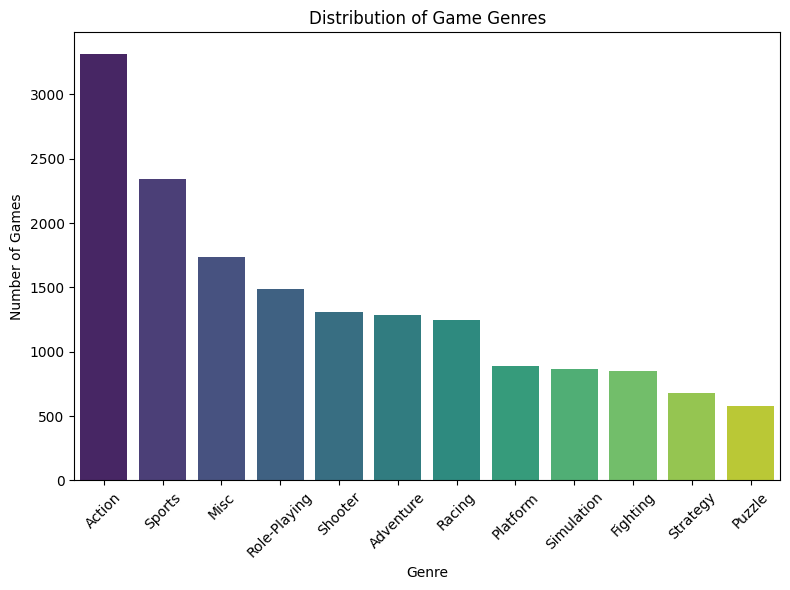

In [24]:
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Number of Games')
plt.title('Distribution of Game Genres')
plt.tight_layout()
plt.show()

## **Chart 2: Distribution of Game Platforms**

**Why this chart?**

To understand which platforms have the highest number of game releases.

**Insight:**

Platforms like DS and PS2 have the most games, showing their historical popularity.

**Business Impact:**

Companies can analyze why these platforms performed well to strategize for future launches on modern platforms.

<ipython-input-28-befc8a5c387b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=platform_counts.index, x=platform_counts.values, palette='Set2')


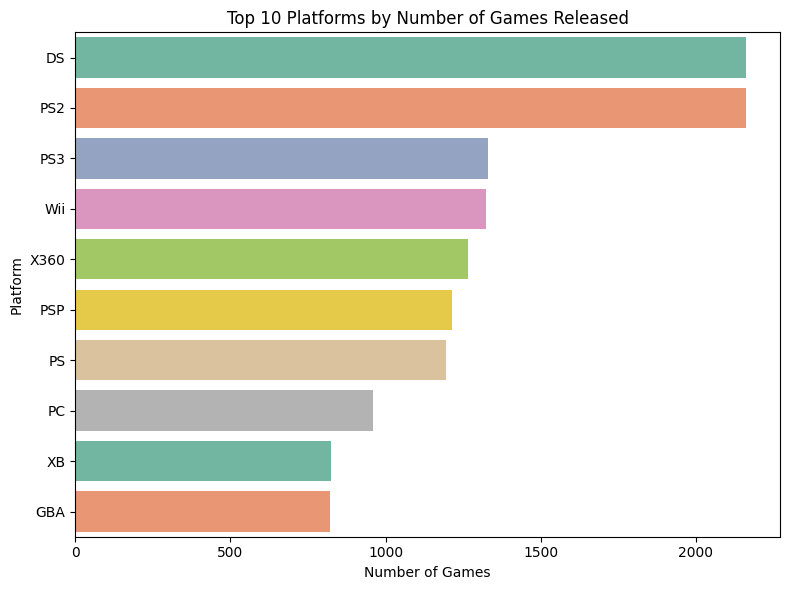

In [28]:
platform_counts = df['Platform'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(y=platform_counts.index, x=platform_counts.values, palette='Set2')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.title('Top 10 Platforms by Number of Games Released')
plt.tight_layout()
plt.show()

## **Chart 3: Distribution of Game Releases Over the Years**

**Why this chart?**

To see how the number of game releases has changed over time.

**Insight:**

There was a peak in releases around 2008-2010, possibly due to market expansion and rise of consoles.

**Business Impact:**

Understanding industry trends helps predict future opportunities or saturation periods.

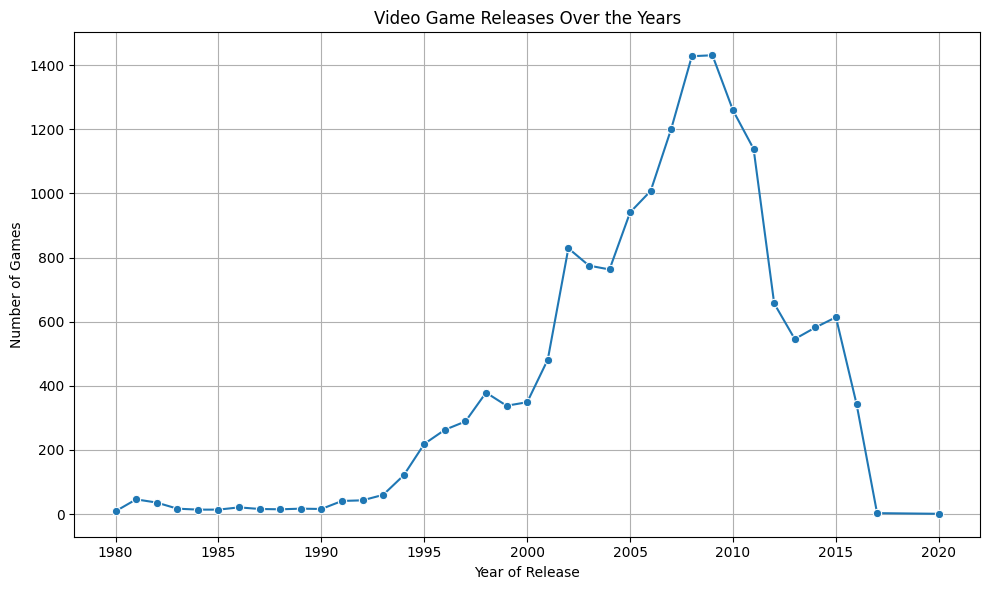

In [29]:
# Clean year data (remove nulls for this chart)
df_years = df[df['Year'].notnull()]
year_counts = df_years['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=year_counts.index.astype(int), y=year_counts.values, marker='o')
plt.ylabel('Number of Games')
plt.xlabel('Year of Release')
plt.title('Video Game Releases Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

# **BIVARIATE ANALYSIS :**

Relationship between 2 variables.

## **Chart 6: Platform vs Global Sales**

**Why this chart?**

To find which platforms generated the most global sales across all games.

**Insight:**

Platforms like PS2 and X360 have generated the highest global sales, proving their strong market presence during their time.

**Business Impact:**

Game publishers can analyze what made these platforms successful to replicate similar strategies on current-gen consoles.

<ipython-input-30-1db1a75a4c35>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='magma')


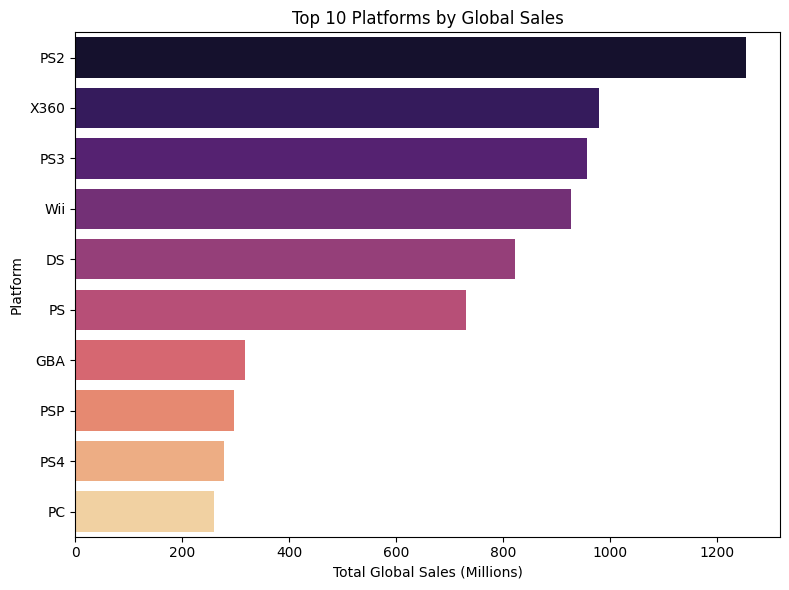

In [30]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='magma')
plt.xlabel('Total Global Sales (Millions)')
plt.title('Top 10 Platforms by Global Sales')
plt.tight_layout()
plt.show()

## **Chart 7: Genre vs Region-wise Sales**

**Why this chart?**

To compare how each genre performs across different regions (NA, EU, JP, etc.).

**Insight:**

Genres like Shooter and Sports are strong in NA and EU, while Role-Playing is very strong in Japan.

**Business Impact:**

Studios can tailor game genres for specific regional markets based on player preferences.

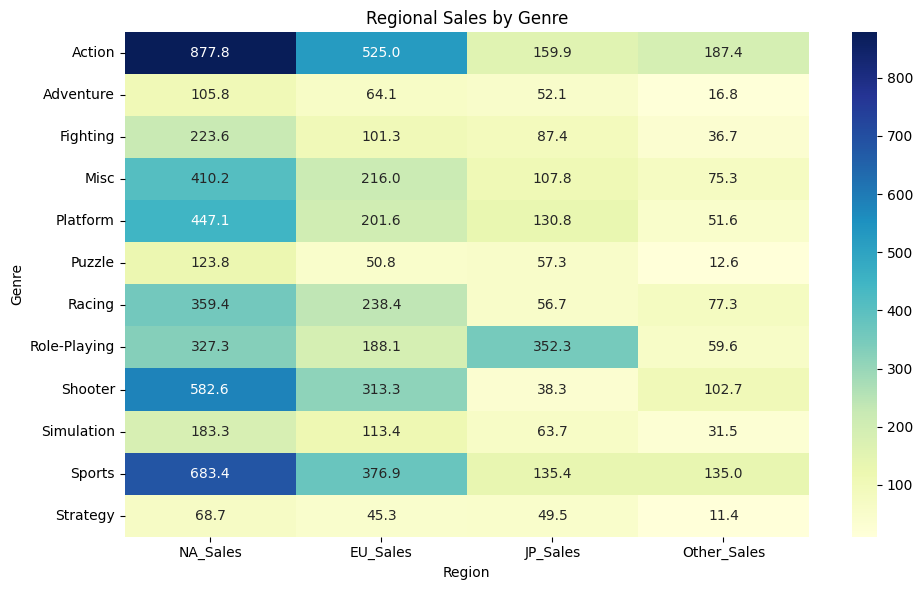

In [33]:
genre_region_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(10,6))
sns.heatmap(genre_region_sales, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Regional Sales by Genre')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

## **Chart 8: Year vs Global Sales**

**Why this chart?**

To track how global game sales have changed over the years.

**Insight:**

Global sales peaked between 2007 and 2010, then gradually declined, possibly due to digital-only releases or market saturation.

**Business Impact:**

Companies can investigate what drove the peak years and adapt strategies for future growth or shifts (e.g., mobile, cloud gaming).

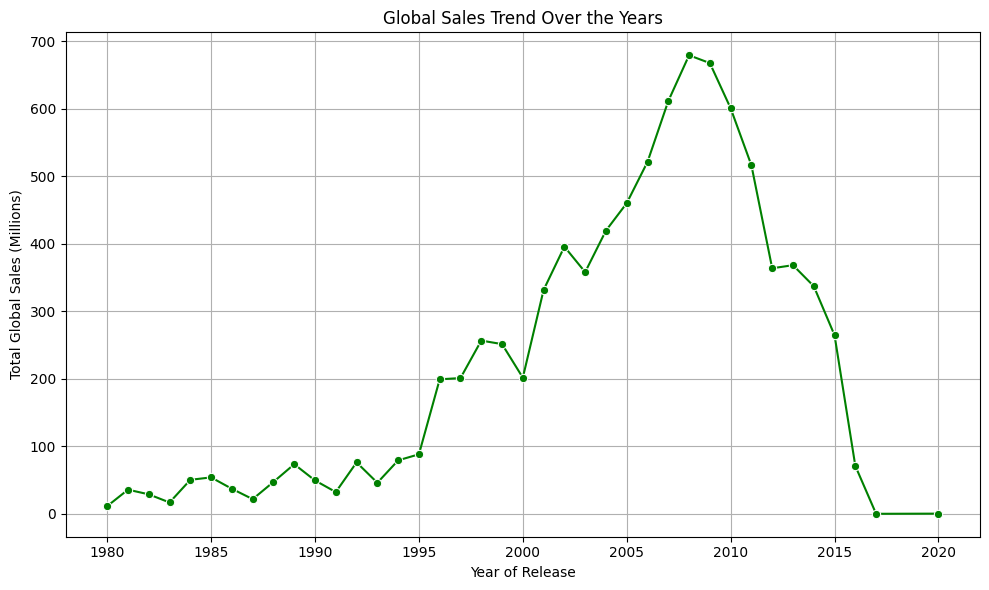

In [32]:
year_sales = df[df['Year'].notnull()].groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=year_sales.index.astype(int), y=year_sales.values, marker='o', color='green')
plt.ylabel('Total Global Sales (Millions)')
plt.xlabel('Year of Release')
plt.title('Global Sales Trend Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

# **MULTIVARIATE ANALYSIS :**

Understand interaction between 3 or more variables.

## **Chart 11:  Publisher vs Genre vs Global Sales**

**Why this chart?**

To identify which publishers dominate specific genres in terms of sales.


**Insight:**

Certain publishers like Nintendo, Electronic Arts, and Activision consistently top sales across multiple genres.

**Business Impact:**

Knowing the genre strength of competitors helps companies decide whether to compete or find niche markets.

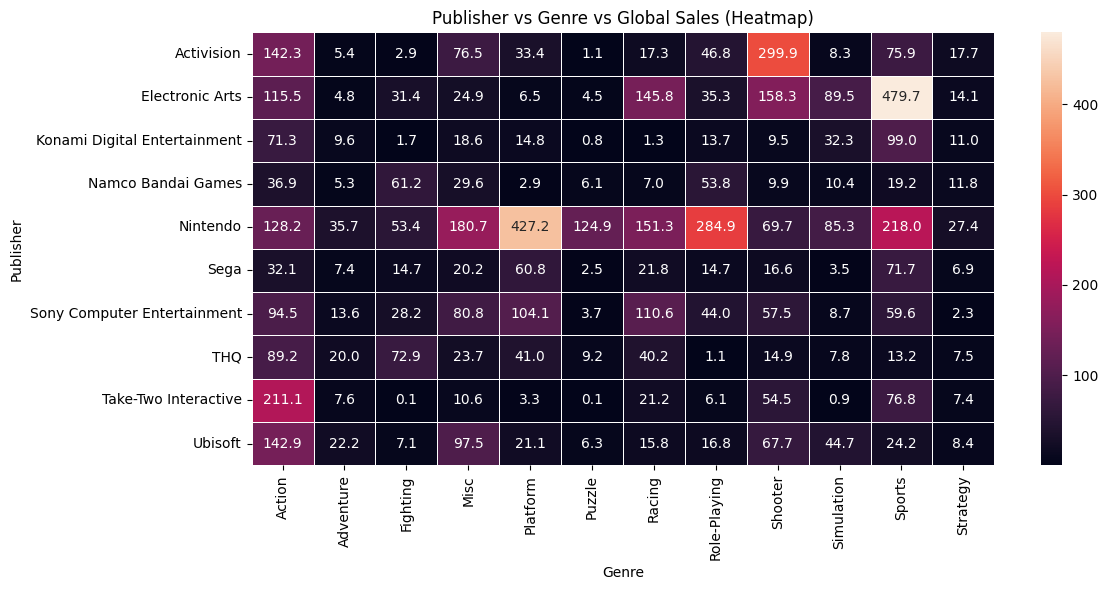

In [42]:
top_publishers = df['Publisher'].value_counts().head(10).index
filtered_df = df[df['Publisher'].isin(top_publishers)]
publisher_genre_sales = filtered_df.pivot_table(index='Publisher', columns='Genre', values='Global_Sales', aggfunc='sum').fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(publisher_genre_sales, annot=True, fmt=".1f", cmap="rocket", linewidths=0.5)
plt.title('Publisher vs Genre vs Global Sales (Heatmap)')
plt.xlabel('Genre')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

## **Chart 12: Genre vs NA, EU, JP Sales**

**Why this chart?**

To compare how popular each genre is across different major regions.



**Insight:**

Shooter and Sports games dominate in NA and EU, while Role-Playing is most favored in Japan.

**Business Impact:**

This regional insight helps companies create region-focused marketing and content strategy.

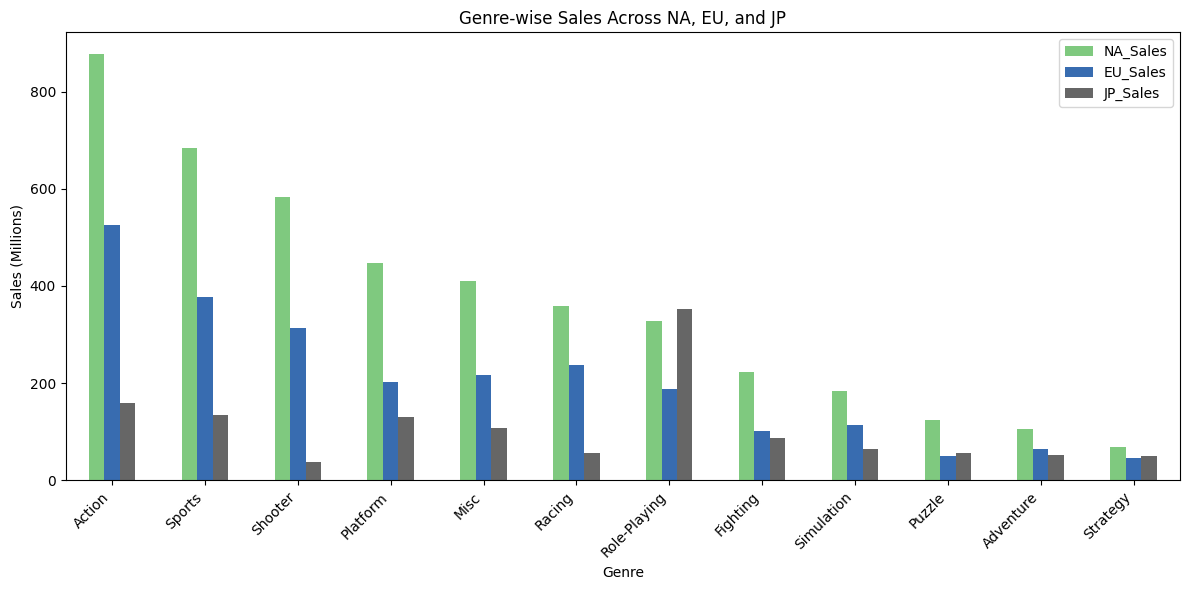

In [44]:
genre_region = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().sort_values(by='NA_Sales', ascending=False)

genre_region.plot(kind='bar', figsize=(12,6), colormap='Accent')
plt.ylabel('Sales (Millions)')
plt.title('Genre-wise Sales Across NA, EU, and JP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Chart 13: Genre-wise Global Sales Distribution by Year**

**Why this chart?**

To see how different genres have performed globally over the years — capturing time trends.

**Insight**

Action and Sports genres peaked around 2008–2010, while Puzzle and Strategy remained low throughout.

**Business Impact:**

Studios can forecast genre trends over time and plan content accordingly.

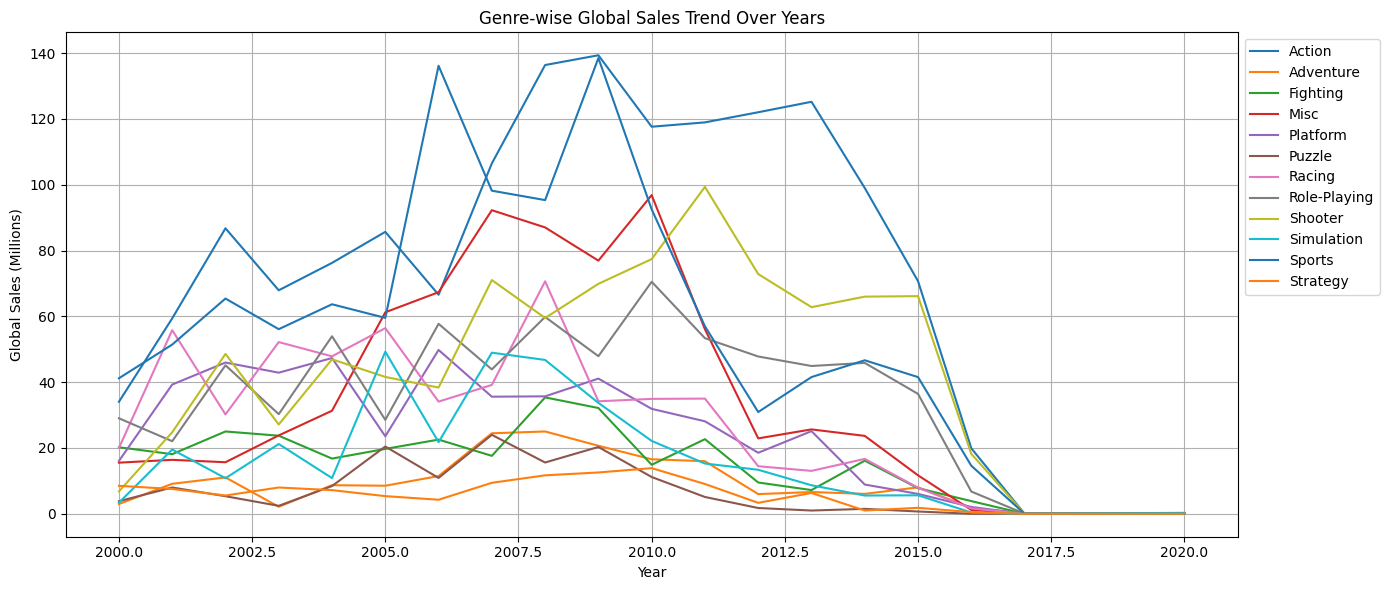

In [38]:
genre_year_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)
genre_year_sales = genre_year_sales.loc[genre_year_sales.index >= 2000]  # optional trimming

plt.figure(figsize=(14,6))
for genre in genre_year_sales.columns:
    plt.plot(genre_year_sales.index, genre_year_sales[genre], label=genre)

plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.title('Genre-wise Global Sales Trend Over Years')
plt.grid(True)
plt.tight_layout()
plt.show()

# **STEP 5: Solution to Business Objective**

## **What do you suggest the client to achieve Business Objective ?**

Business Objective:
Understand video game market dynamics and sales patterns to make better business and content decisions.

✅ Suggestions:

1. Focus on Action & Sports Genres for Maximum ROI:
   - These genres have consistently shown the highest global sales.
   - Increasing content (especially exclusive titles) in these genres can boost market share and revenue.

2. Expand in Europe & North America, But Don't Ignore Japan:
   - Sales are highest in NA and EU, but Japan has a unique taste (e.g., role-playing games).
   - Region-specific marketing and game design can tap into untapped local demand.

3. Diversify Platforms & Launch High-Selling Titles on Multiple Consoles:
   - Some platforms like PS2 and X360 dominate sales.
   - Porting successful games across platforms can increase sales without large development costs.


# **Conclusion**

🧠 Summary of Insights:
- The market is highly genre and region-driven.
- Action, Sports, and Shooter games dominate globally.
- North America leads in sales, followed by Europe, while Japan favors niche genres.


📌 Final Note:

By aligning genre focus, platform distribution, and regional marketing strategies based on sales data,
the client can make smarter investment and development choices, ensuring better market penetration and higher global impact.
